# Under development

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns


In [2]:
sns.set()
sns.set_style("darkgrid")

%load_ext nb_black

<IPython.core.display.Javascript object>

# EDA of Brazilian Energy Production from 2022

In [3]:
df_energy = pd.read_excel("ANEEL-dados.ods", engine="odf")
df_energy.head()

,DatGeracaoConjuntoDados,NomEmpreendimento,IdeNucleoCEG,CodCEG,SigUFPrincipal,SigTipoGeracao,DscFaseUsina,DscOrigemCombustivel,DscFonteCombustivel,DscTipoOutorga,...,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw,IdcGeracaoQualificada,NumCoordNEmpreendimento,NumCoordEEmpreendimento,DatInicioVigencia,DatFimVigencia,DscPropriRegimePariticipacao,DscSubBacia,DscMuninicpios
0,2022-05-01,E,8,PCH.PH.MG.000008-6.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,1400,0,Não,-20.124799,-43.870202,2000-07-07,2030-07-07,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,Nova Lima - MG
1,2022-05-01,F,9,PCH.PH.MG.000009-4.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,3972,0,Não,-20.131873,-43.876935,2000-07-07,2030-07-07,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,Nova Lima - MG
2,2022-05-01,G,10,PCH.PH.MG.000010-8.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,1440,0,Não,-20.137545,-43.891926,2000-08-31,2030-08-31,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,Nova Lima - MG
3,2022-05-01,14 de Julho,12,UHE.PH.RS.000012-4.1,RS,UHE,Operação,Hídrica,Potencial hidráulico,Concessão,...,100000,47500,Não,-29.064753,-51.674942,2001-03-15,2036-03-15,100% para COMPANHIA ENERGÉTICA RIO DAS ANTAS (...,86 - Taquari,"Bento Gonçalves - RS, Cotiporã - RS"
4,2022-05-01,Abaúna,15,CGH.PH.RS.000015-9.1,RS,CGH,Operação,Hídrica,Potencial hidráulico,Registro,...,720,510,Não,-27.823775,-52.069997,NaN,NaN,100% para Cooperativa de Geração de Energia e ...,"72 - Uruguai, Inhanduva, Peixe e outros",Floriano Peixoto - RS


<IPython.core.display.Javascript object>

## Energy Matrix

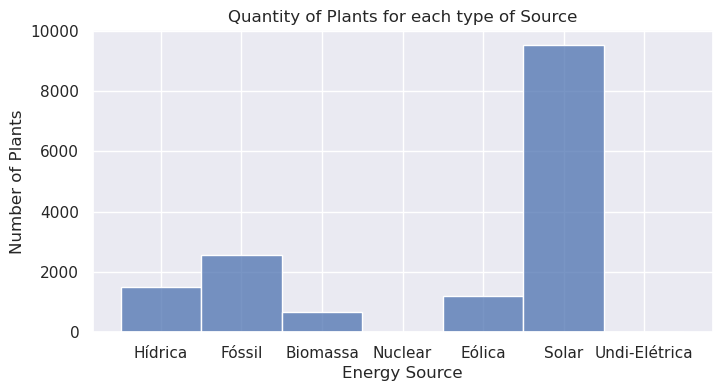

<IPython.core.display.Javascript object>

In [4]:
fig = plt.figure(figsize=(8, 4), dpi=100)

sns.histplot(data=df_energy, x="DscOrigemCombustivel")

plt.title("Quantity of Plants for each type of Source")
plt.xlabel("Energy Source")
plt.ylabel("Number of Plants")

plt.show()

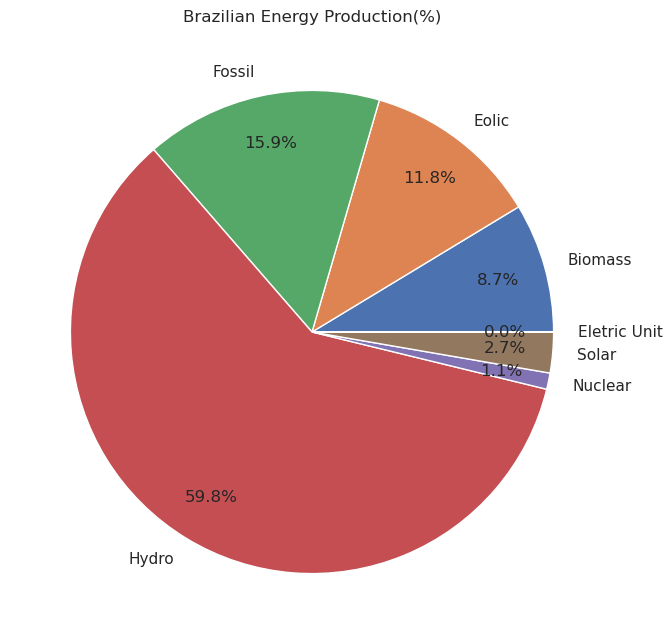

<IPython.core.display.Javascript object>

In [5]:
df_PotSource = df_energy.groupby(by=["DscOrigemCombustivel"])[
    ["MdaPotenciaFiscalizadaKw"]
].sum()
label = ["Biomass", "Eolic", "Fossil", "Hydro", "Nuclear", "Solar", "Eletric Unit"]

plt.figure(dpi=100, figsize=(8, 8))
plt.title("Brazilian Energy Production(%)")
plt.pie(
    df_PotSource["MdaPotenciaFiscalizadaKw"].values,
    labels=label,
    autopct="%1.1f%%",
    pctdistance=0.8,
)
plt.show()

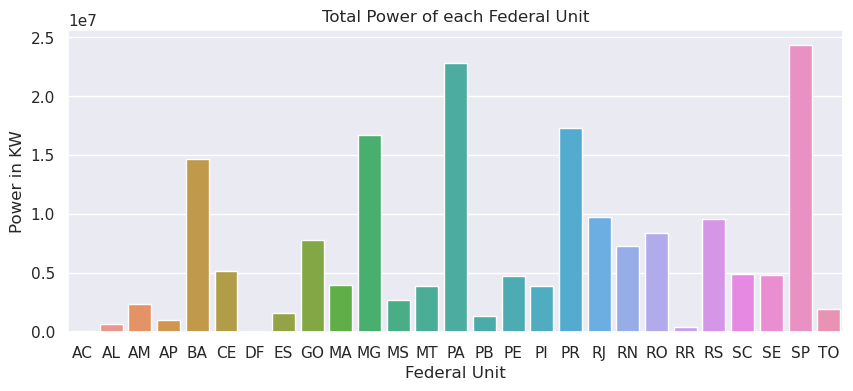

<IPython.core.display.Javascript object>

In [6]:
fig = plt.figure(figsize=(10, 4), dpi=100)
df_FederalUnit = df_energy.groupby(by="SigUFPrincipal").sum()

sns.barplot(data=df_FederalUnit, x=df_FederalUnit.index, y="MdaPotenciaFiscalizadaKw")

plt.title("Total Power of each Federal Unit")
plt.xlabel("Federal Unit")
plt.ylabel("Power in KW")

plt.show()

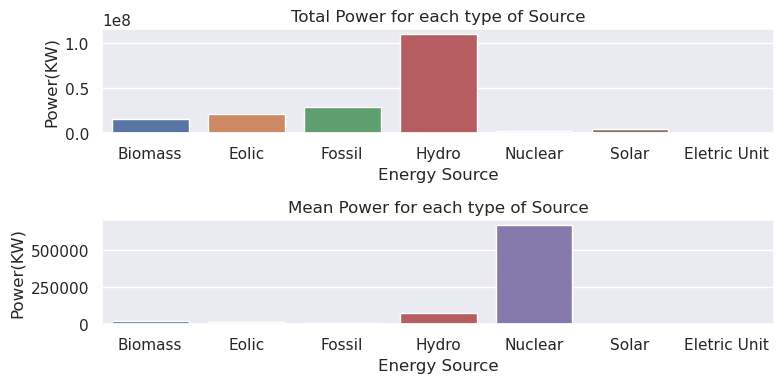

<IPython.core.display.Javascript object>

In [7]:
fig, axes = plt.subplots(2, figsize=(8, 4), dpi=100, sharey="row")
df_SourceTotal = df_energy.groupby(by="DscOrigemCombustivel").sum()
df_SourceMean = df_energy.groupby(by="DscOrigemCombustivel").mean()
label = ["Biomass", "Eolic", "Fossil", "Hydro", "Nuclear", "Solar", "Eletric Unit"]


sns.barplot(ax=axes[0], data=df_SourceTotal, x=label, y="MdaPotenciaFiscalizadaKw")
axes[0].set_title("Total Power for each type of Source")
axes[0].set_xlabel("Energy Source")
axes[0].set_ylabel("Power(KW)")

sns.barplot(ax=axes[1], data=df_SourceMean, x=label, y="MdaPotenciaFiscalizadaKw")
axes[1].set_title("Mean Power for each type of Source")
axes[1].set_xlabel("Energy Source")
axes[1].set_ylabel("Power(KW)")

plt.tight_layout()
plt.show()

# Power Capacity Installed per Year(1974-2021)

## First Sheet : Production per Type

In [8]:
df_Power_Production = pd.read_csv(
    "CapacidadeInstaladaEnergia.csv", sep=";", index_col=0, decimal="."
)
df_Power_Production.head()

,Hidro-SP/PIE,Hidro-APE,Hidro-TOTAL,Termo-SP/PIE,Termo-APE,Termo-TOTAL,Eolica-SP/PIE,Eolica-APE,Eolica-TOTAL,Solar-SP/PIE,Solar-APE,Solar-TOTAL,Nuclear-SP/PIE,Total-SP/PIE,Total-APE,Total-TOTAL
1974,13224.0,500.0,13724.0,2489.0,1920.0,4409.0,0.0,0.0,0.0,NaN,NaN,NaN,0,15713.0,2420.0,18133.0
1975,15815.0,501.0,16316.0,2436.0,2216.0,4652.0,0.0,0.0,0.0,NaN,NaN,NaN,0,18251.0,2717.0,20968.0
1976,17343.0,561.0,17904.0,2457.0,2223.0,4680.0,0.0,0.0,0.0,NaN,NaN,NaN,0,19800.0,2784.0,22584.0
1977,18835.0,561.0,19396.0,2729.0,2214.0,4943.0,0.0,0.0,0.0,NaN,NaN,NaN,0,21564.0,2775.0,24339.0
1978,21104.0,561.0,21665.0,3048.0,2259.0,5307.0,0.0,0.0,0.0,NaN,NaN,NaN,0,24152.0,2820.0,26972.0


<IPython.core.display.Javascript object>

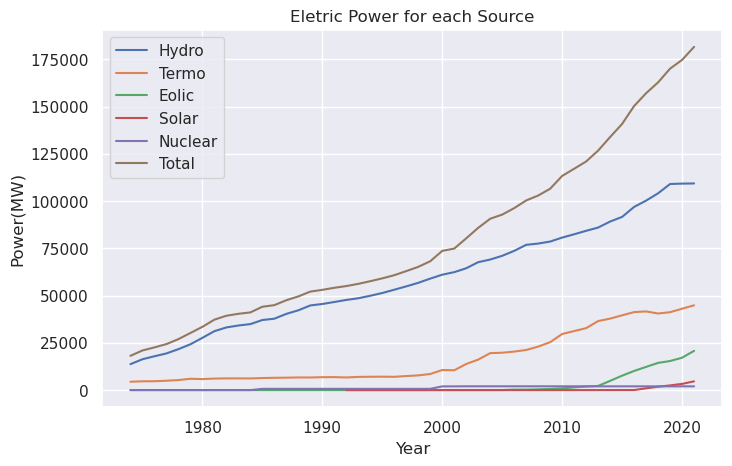

<IPython.core.display.Javascript object>

In [9]:
fig = plt.figure(figsize=(8, 5), dpi=100)
col = [
    "Hidro-TOTAL",
    "Termo-TOTAL",
    "Eolica-TOTAL",
    "Solar-TOTAL",
    "Nuclear-SP/PIE",
    "Total-TOTAL",
]
label = ["Hydro", "Termo", "Eolic", "Solar", "Nuclear", "Total"]

plt.title("Eletric Power for each Source")
plt.xlabel("Year")
plt.ylabel("Power(MW)")
plt.plot(df_Power_Production[col])
plt.legend(label)
plt.show()